In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

In [3]:
dt = pd.read_csv('Tweets.csv')

In [3]:
'''dt.shape
((dt.isna().sum() /len(dt)) *100).round(2) '''

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [4]:
del dt['negativereason_gold']
del dt['airline_sentiment_gold']
del dt['tweet_coord']

len(dt)

14640

In [5]:
print(dt.groupby('airline')['airline_sentiment'].count().sort_values(ascending= False))
airlines = ['United', 'US Airways', 'American', 'Southwest','Delta', 'Virgin America']

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


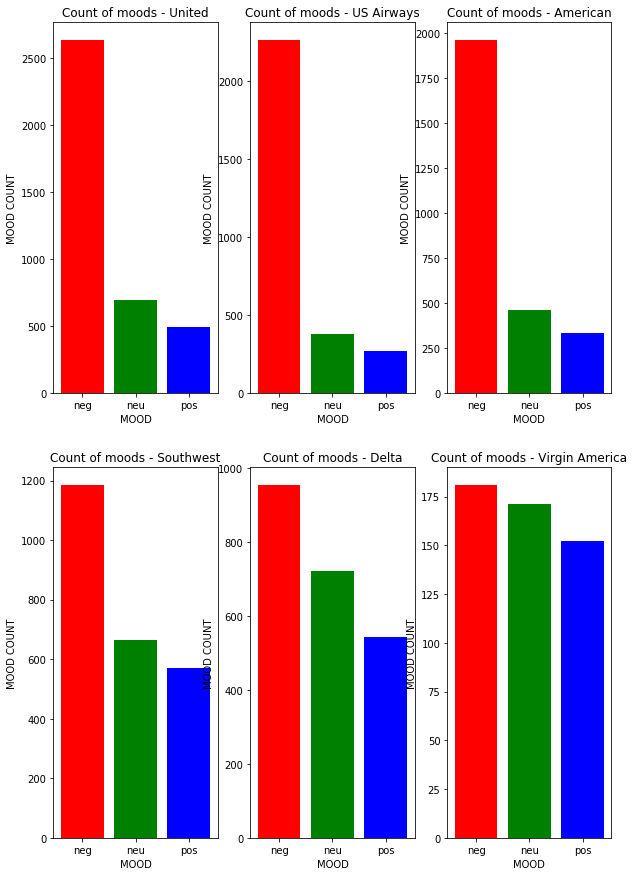

In [6]:
plt.figure(1,figsize=(10, 15))

for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1) #2 rorw,3 cols and indices+1(*********problem)
    new_dt = dt[dt['airline']==i] # get each airlines data in new_dt
    count = new_dt['airline_sentiment'].value_counts() # for each airlines count the sentiments..like...how many positive,neg and neutral
    index = ['neg','neu','pos'] # to name the bar as 1 , 2 , 3
    plt.bar(index,count,color = ['red','green','blue'])
    plt.ylabel('MOOD COUNT')
    plt.xlabel('MOOD')
    plt.title('Count of moods - ' + i)

In [7]:
#________WORDCLOUD FOR NEGATIVE____________

from wordcloud import WordCloud,STOPWORDS

new_dt = dt[dt['airline_sentiment']=='negative']
words = '                                       '.join(new_dt['text'])
cleaned_word = ' ' . join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and word != 'RT'])  ######PROBLEM>>>>>
wc = WordCloud(stopwords = STOPWORDS, background_color = 'black',width =4000, height=4000)
wc.generate(cleaned_word)

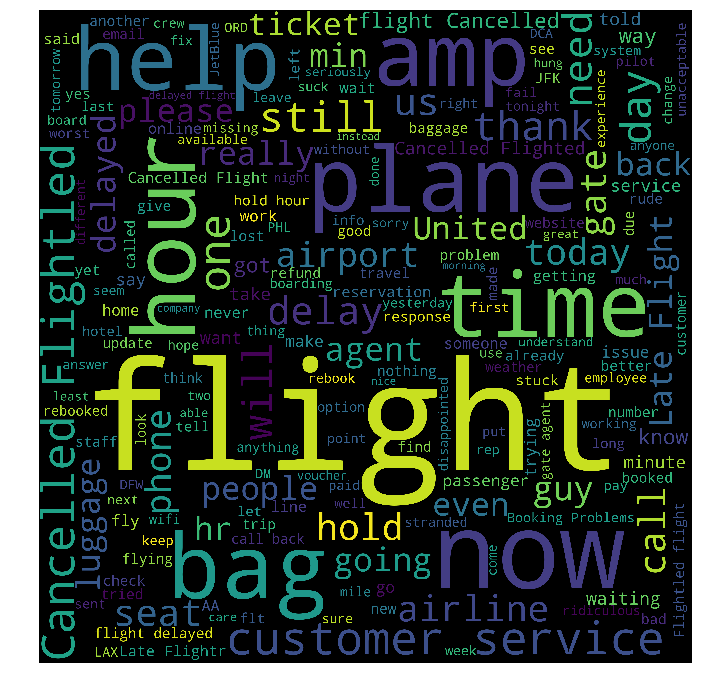

In [9]:
plt.figure(1,figsize = (12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
#________WORDCLOUD FOR POSITIVE____________

from wordcloud import WordCloud,STOPWORDS

new_dt = dt[dt['airline_sentiment']=='positive']
words = ' '.join(new_dt['text'])
cleaned_word = ' ' . join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and word != 'RT'])
#wc = WordCloud(stopwords = STOPWORDS, background_color = 'black',width =4000, height=4000)
#wc.generate(cleaned_word)

In [8]:
plt.figure(1,figsize = (12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

NameError: name 'wc' is not defined

<Figure size 864x864 with 0 Axes>

In [6]:
'''text = "I called him to call his brother whom I know better"
def freq_(str):
    str =str.split()
    box = []
    
    for i in str:
        if i not in box:
                box.append(i)
    for i in range(0,len(box)):
        if(str.count(box[i]) > 0):
            print( str[i], str.count(box[i])  )
    
    
freq_(text)

'''

'text = "I called him to call his brother whom I know better"\ndef freq_(str):\n    str =str.split()\n    box = []\n    \n    for i in str:\n        if i not in box:\n                box.append(i)\n    for i in range(0,len(box)):\n        if(str.count(box[i]) > 0):\n            print( str[i], str.count(box[i])  )\n    \n    \nfreq_(text)\n\n'

In [9]:
# Getting the frequency of Positive text's words

def frequency_checker(str):
    #break the strings into words
    str = str.split()
    
    str_box = []
    
    for i in str:
        if i not in str_box:
            str_box.append(i)
    for i in range(0,len(str_box)):
        if(str.count(str_box[i]) > 50):
            print("Frequency of " , str_box[i] , "is - "  , str.count(str_box[i]))

            
            
frequency_checker(cleaned_word)

Frequency of  to is -  923
Frequency of  the is -  924
Frequency of  time is -  59
Frequency of  I is -  574
Frequency of  fly is -  54
Frequency of  this is -  143
Frequency of  :) is -  96
Frequency of  it is -  166
Frequency of  was is -  226
Frequency of  and is -  416
Frequency of  an is -  74
Frequency of  good is -  75
Frequency of  so is -  163
Frequency of  much is -  54
Frequency of  is is -  219
Frequency of  a is -  501
Frequency of  great is -  144
Frequency of  my is -  320
Frequency of  &amp; is -  77
Frequency of  on is -  327
Frequency of  I'm is -  67
Frequency of  flying is -  59
Frequency of  your is -  212
Frequency of  all is -  92
Frequency of  from is -  124
Frequency of  Thanks! is -  69
Frequency of  for is -  658
Frequency of  flight is -  263
Frequency of  but is -  91
Frequency of  you is -  509
Frequency of  would is -  56
Frequency of  be is -  135
Frequency of  with is -  195
Frequency of  you. is -  77
Frequency of  love is -  85
Frequency of  You is - 

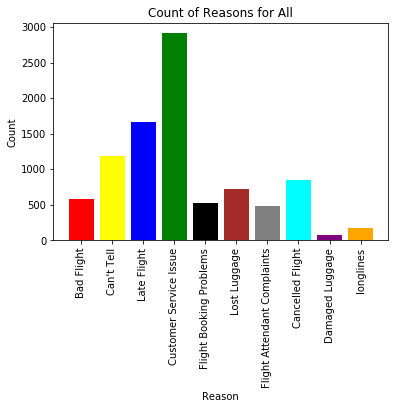

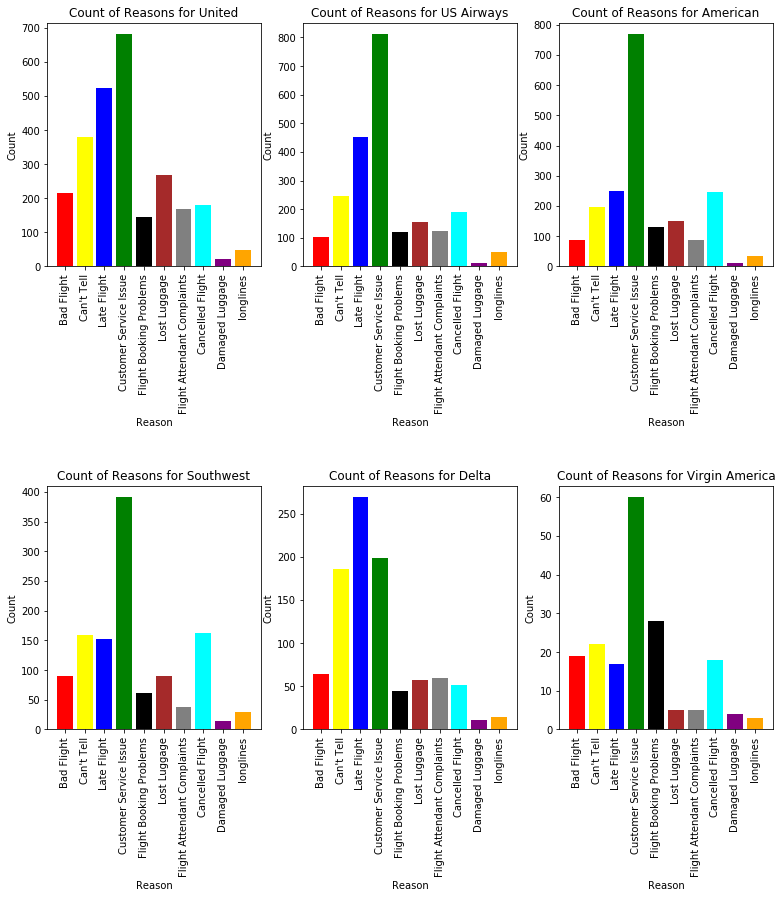

In [10]:
#____Getting the number of negative reasons____
'''Here we will find the reason why people are showing their negative emotions'''

dt['negativereason'].nunique() #number of unique negative reason
nr_count = dt['negativereason'].value_counts()

def NR_Count(Airline):
    if Airline=='All':
        a=dt
    else:
        a=dt[dt['airline']==Airline]
    count=dict(a['negativereason'].value_counts())   #counting all the negative reason in dt or a
    Unique_reason=list(dt['negativereason'].unique()) #counting the unique reasons
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan'] #getting all the reasons xcept nan
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame




def plot_reason(Airline):
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
    
    
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [11]:
dt['negativereason'].nunique()
dt['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [12]:
date = dt.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
dt = date
day_dt = dt.groupby(['tweet_created','airline','airline_sentiment']).size()
#day_df = day_df.reset_index()
day_dt

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative              51
                               neutral               63
                               positive              47
               Southwest       negative             162
                               neutral               69
                               positive              56
               US Airways      negative             156
                               neutral               22
                               positive              33
               United          negative             173
                               neutral               50
                               positive              29
               Virgin America  negative              10
                               neutral               16
                               positive              16
2015-02-18     Delta           negative             127
                               neutral               84

In [11]:
def preprocessor(tweets):
    letters_only = re.sub("[^a-zA-Z]", " " , tweets)
    lower_words = letters_only.lower().split()
    stop_words = set(stopwords.words("english"))
    meaningful_words = [words for words in lower_words if not words in stop_words]
    join_words = ' ' .join(meaningful_words)
    return join_words
dt['cleaned_text'] = dt['text'].apply(lambda x : preprocessor(x))

In [12]:
Xtrain , Xtest = train_test_split(dt, test_size = 0 , random_state = 0)
train_word_box = []
for text in Xtrain['cleaned_text']:
    train_word_box.append(text)
test_word_box = []
for w in Xtest['cleaned_text']:
    test_word_box.appen(w)
    
    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
training = cv.fit_transform(train_word_box)
test = cv.transform(test_word_box)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(training,Xtrain['airline_sentiment'])
senti_prediction = rfc.predict(test)
senti_prediction


